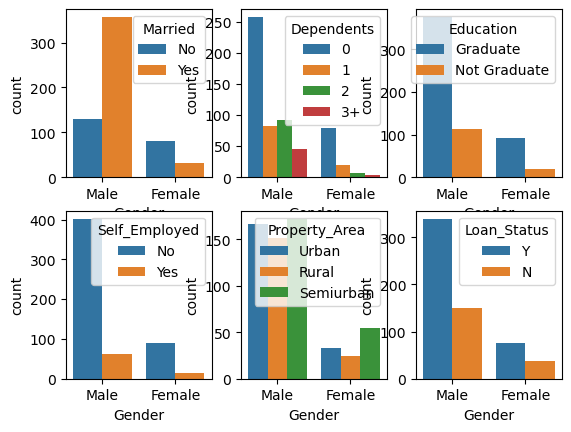

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics


loan = pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
loan.head()
fig, ax = plt.subplots(2,3)
sns.countplot(x="Gender", hue="Married", data=loan, ax=ax[0,0])
sns.countplot(x="Gender", hue="Dependents", data=loan, ax=ax[0,1])
sns.countplot(x="Gender", hue="Education", data=loan, ax=ax[0,2])
sns.countplot(x="Gender", hue="Self_Employed", data=loan, ax=ax[1,0])
sns.countplot(x="Gender", hue="Property_Area", data=loan, ax=ax[1,1])
sns.countplot(x="Gender", hue="Loan_Status", data=loan, ax=ax[1,2])
fig.show()



In [2]:
loan["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
loan["Married"].replace({'No': 0, 'Yes': 1}, inplace=True)
loan["Dependents"].replace({'0': 0, '1': 1, '2': 2, '3+': 3}, inplace=True)
loan["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
loan["Self_Employed"].replace({'No': 0, 'Yes': 1}, inplace=True)
loan["Property_Area"].replace({'Rural': 0, 'Urban': 1, "Semiurban": 2}, inplace=True)
loan["Loan_Status"].replace({'N': 0, 'Y': 1}, inplace=True)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


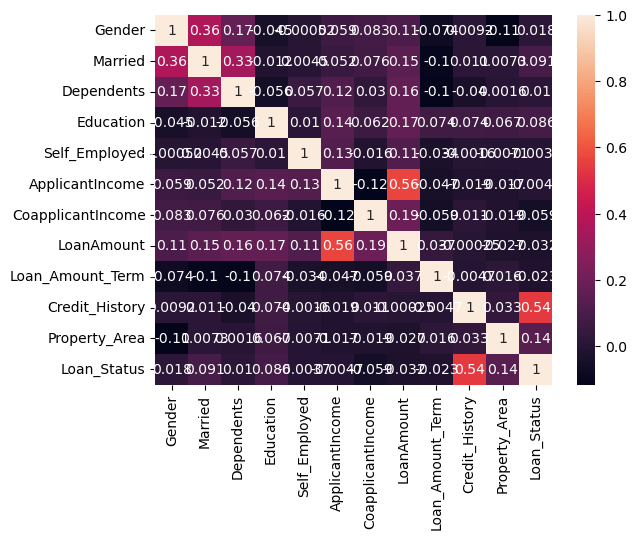

In [3]:
loan["Gender"].fillna(value=loan['Gender'].mode()[0],inplace=True)
loan["Married"].fillna(value=loan['Married'].mode()[0],inplace=True)
loan["Dependents"].fillna(value=loan['Dependents'].mode()[0],inplace=True)
loan["Self_Employed"].fillna(value=loan['Self_Employed'].mode()[0],inplace=True)
loan["LoanAmount"].fillna(value=loan['LoanAmount'].mode()[0],inplace=True)
loan["Loan_Amount_Term"].fillna(value=loan['Loan_Amount_Term'].mode()[0],inplace=True)
loan["Credit_History"].fillna(value=loan['Credit_History'].mode()[0],inplace=True)
corr_matrix = loan.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [4]:
X=loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan["Loan_Status"]
X.head()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)


(614, 11) (552, 11) (62, 11)


In [5]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)


SVC(kernel='linear')

Accuracy on testing data:  0.8064516129032258
Precision on testing data: 0.803921568627451
Recall on testing data:  0.9534883720930233
TN=9, FP=10, FN=2, TP=41


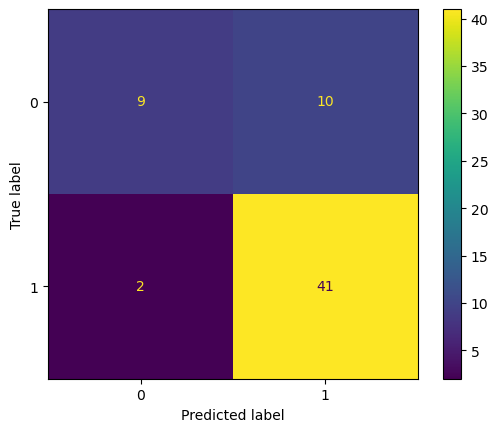

In [6]:
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict))
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [7]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)


Calculated accuracy =  0.8064516129032258
Calculated precision =  0.803921568627451
Calculated recall =  0.9534883720930233


In [8]:
#Evaluating the model - Recap
train_predict=model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict))


Accuracy on training data:  0.8115942028985508
Precision on training data: 0.7919320594479831
Recall on training data: 0.9841688654353562


Accuracy on testing data:  0.8064516129032258
Precision on testing data: 0.803921568627451
Recall on testing data:  0.9534883720930233
TN=9, FP=10, FN=2, TP=41


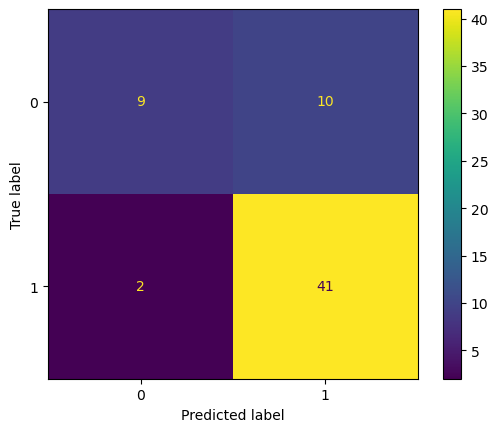

In [9]:
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict))
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [10]:
X_train_gb = X_train.drop(columns=['Gender'])
X_test_gb = X_test.drop(columns=['Gender'])
model_gb = svm.SVC(kernel='linear')
model_gb.fit(X_train_gb,Y_train)


SVC(kernel='linear')

In [11]:
#Using Gender as a parameter in the SVM model
train_predict_gb=model_gb.predict(X_train_gb)
print("Accuracy on train data: ", metrics.accuracy_score(Y_train, train_predict_gb))
print("Precision using train data:", metrics.precision_score(Y_train, train_predict_gb))
print("Recall using train data:", metrics.recall_score(Y_train, train_predict_gb))


Accuracy on train data:  0.7934782608695652
Precision using train data: 0.7743271221532091
Recall using train data: 0.9868073878627969


In [12]:
#Gender Blind SVM model:
test_predict_gb=model_gb.predict(X_test_gb)
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, test_predict_gb))
print("Precision using test data:", metrics.precision_score(Y_test, test_predict_gb))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict_gb))


Accuracy on test data:  0.7903225806451613
Precision using test data: 0.7884615384615384
Recall on testing data:  0.9534883720930233


In [13]:
#the Gender Blind SVM model has a higher recall score so the Gender Blind model is better at identifying positive cases and correctly predicting the outcome when it's positive)
#the first model has a slightly higher precision score, which means that it is better at avoiding false positives and correctly predicting negative outcomes
#The accuracy scores of both models are similar.


In [14]:
PROTECTED  =  "Gender" 
MEN =  1.0 #male 
WOMEN = 0.0 #women
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)


[ 0  1  3  4  5  6  7  8 10 11 12 14 15 16 17 18 19 20 21 23 24 25 26 27
 29 30 31 32 33 34 37 38 40 42 43 44 45 46 47 48 49 50 51 52 53 55 56 57
 60 61] No of Men = 50
[ 2  9 13 22 28 35 36 39 41 54 58 59] No of Women = 12


In [15]:
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)


[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [16]:
#Extract the predicted outcomes for the two groups
test_predict_m = [test_predict[i] for i in men_indices]
test_predict_f = [test_predict[i] for i in women_indices]
print(test_predict_m)
print(test_predict_f)


[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [17]:
from sklearn.metrics import confusion_matrix

# For Male group
cm_m = confusion_matrix(Y_test_m, test_predict_m)
print("Confusion matrix for Male group:")
print(cm_m)

# For Female group
cm_f = confusion_matrix(Y_test_f, test_predict_f)
print("Confusion matrix for Female group:")
print(cm_f)


Confusion matrix for Male group:
[[ 9  6]
 [ 1 34]]
Confusion matrix for Female group:
[[0 4]
 [1 7]]


In [18]:
print(metrics.classification_report(Y_test_m, test_predict_m))


              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.85      0.97      0.91        35

    accuracy                           0.86        50
   macro avg       0.88      0.79      0.81        50
weighted avg       0.86      0.86      0.85        50



In [19]:
print(metrics.classification_report(Y_test_f, test_predict_f))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.32      0.44      0.37        12
weighted avg       0.42      0.58      0.49        12

